In [122]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf 
from tensorflow.python.framework import ops

%matplotlib inline

## Visualize dataframe

In [123]:
dfz = pd.read_excel('BTC daily_database.xlsx', sheet_name=0)
# testing the input is correct or not
print(dfz.head())

        Date  Price       RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
0 2011-12-16   3.25  0.514151           0.591527  1.594689   0.500194   
1 2011-12-18   3.25  0.443243           0.516482  1.489778   0.571086   
2 2011-12-19   3.50  0.511962           1.311777  1.473728   1.266368   
3 2011-12-20   4.75  0.822695           3.461711  1.840524   3.831441   
4 2011-12-21   4.38  0.753247           2.180044  1.969366   2.760808   

   actions  y-hat  Unnamed: 8   Unnamed: 9  
0      NaN      2           1  2157.000000  
1      NaN      2           1     0.912437  
2      NaN      2           1          NaN  
3      NaN      2           1          NaN  
4      NaN      2           1          NaN  


## Randomize sampling

In [124]:
def shuffler(filename):
  dfs = pd.read_excel(filename, sheet_name=0, header=0)
  # return the pandas dataframe
  return dfs.reindex(np.random.permutation(dfs.index))

In [125]:
df = shuffler('BTC daily_database.xlsx')
print(df.head())

           Date    Price       RSI  Stedev from 20 MA  MACD n.f  50MA_N.F.  \
1992 2017-06-03  2488.94  0.680345           1.572151  1.167032   1.957879   
1280 2015-06-22   243.60  0.771303           1.091509  2.456207   1.267424   
2149 2017-11-07  6967.64  0.683866           1.148204  1.116497   1.628582   
1067 2014-11-18   388.72  0.673406           0.915072  1.519611   0.931693   
1385 2015-10-05   238.60  0.636568           1.295540  0.734069   0.738402   

      actions  y-hat  Unnamed: 8  Unnamed: 9  
1992      NaN      2           1         NaN  
1280      NaN      2           1         NaN  
2149      NaN      2           1         NaN  
1067      NaN      2           1         NaN  
1385      NaN      2           1         NaN  


## Input dataframe

In [126]:
inputX = df.iloc[:,2:6 ].as_matrix()
inputX = inputX.T
inputY = df.iloc[:, 7:8].as_matrix()
inputY = inputY.T
print("X_train shape: " + str(inputX.shape))
print("number of training samples = "+ str(inputX.shape[1]))
print("number of variables = " + str(inputX.shape[0]))
print(inputX)

X_train shape: (4, 2363)
number of training samples = 2363
number of variables = 4
[[ 0.680345    0.77130277  0.68386604 ...  0.70123144  0.69871795
   0.42354248]
 [ 1.57215123  1.09150886  1.14820388 ...  1.19100035  1.21857915
  -0.13331296]
 [ 1.16703172  2.45620738  1.11649711 ...  0.08804087  0.13067132
   0.80795293]
 [ 1.95787908  1.26742422  1.62858206 ...  1.60517657  0.76437971
   0.34977224]]


C:\Users\john liu\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\john liu\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [127]:
inputY

array([[2, 2, 2, ..., 2, 2, 2]], dtype=int64)

## Seperating to train and test datasets

In [128]:
trainX = inputX[:, : -150]
trainY = inputY[:, : -150]
testX = inputX[:, -150: ]
testY = inputY[:, -150: ]
print(trainX.shape)
print(testX.shape)
print(testY.shape)
print(testX[:,: 10])

(4, 2213)
(4, 150)
(1, 150)
[[ 0.42831849  0.91754757  0.67282717  0.47941709  0.3462651   0.19705268
   0.6249251   0.71521197  0.32656624  0.84482143]
 [-1.30284002  1.39972865  0.31029031 -0.76597023 -0.92823343 -1.87590366
   1.64628939  0.95668089 -0.63477071  1.15445844]
 [-2.33192578  2.35449977  0.6826062  -0.99752716 -1.17926572 -1.34191947
   0.57704406  1.56521121 -1.2210259   1.50200195]
 [-0.75757415  2.3940322   0.39701356 -0.13679561 -1.42330937 -2.56270409
   1.25947507  1.79808133 -1.50333185  1.87020068]]


## Layer size inputs 

In [129]:
n_x = inputX.shape[0] # size of input layer
n_h = 5
n_y = inputY.shape[0]
print("n_x's shape = " + str(n_x))
print("first layer(n_h)'s shape = " + str(n_h))
print("n_y's output = " + str(n_y))

n_x's shape = 4
first layer(n_h)'s shape = 5
n_y's output = 1


## Create placeholder


In [130]:
def create_placeholders(n_x, n_y):
    
    #Creates the placeholders for the tensorflow session.
    
    X = tf.placeholder(tf.float32, shape = [n_x,None])
    Y = tf.placeholder(tf.float32, shape = [n_y, 1, None])  
    return X, Y

In [131]:
X, Y = create_placeholders(n_x,n_y)
print ("X = " + str(X))
print(X.shape)
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(4, ?), dtype=float32)
(4, ?)
Y = Tensor("Placeholder_3:0", shape=(1, 1, ?), dtype=float32)


## Initialize parameters

In [175]:

def initialize_parameters(n_x, n_h):
    #Initializes weight parameters to build a neural network with tensorflow  
    #tf.set_random_seed()                              
    W1 = tf.get_variable("W1", [n_h,n_x], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b1 = tf.get_variable("b1", [n_h,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10, n_h], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b2 = tf.get_variable("b2", [10, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [10, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b3 = tf.get_variable("b3", [10, 1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [10, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b4 = tf.get_variable("b4", [10,1], initializer = tf.zeros_initializer())
    W5 = tf.get_variable("W5", [10, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b5 = tf.get_variable("b5", [10,1], initializer = tf.zeros_initializer())
    W6 = tf.get_variable("W6", [10, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b6 = tf.get_variable("b6", [10,1], initializer = tf.zeros_initializer())
    W7= tf.get_variable("W7", [5, 10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    b7 = tf.get_variable("b7", [5,1], initializer = tf.zeros_initializer())
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,
                  "W5": W5,
                  "b5": b5,
                  "W6": W6,
                  "b6": b6,
                  "W7": W7,
                  "b7": b7}

    return parameters

In [176]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters(n_x, n_h)
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))
    print("W4 = " + str(parameters["W4"]))
    print("b4 = " + str(parameters["b4"]))
    print("W5 = " + str(parameters["W5"]))
    print("b5 = " + str(parameters["b5"]))
    print("W6 = " + str(parameters["W6"]))
    print("b6 = " + str(parameters["b6"]))
    print("W7 = " + str(parameters["W7"]))
    print("b7 = " + str(parameters["b7"]))

W1 = <tf.Variable 'W1:0' shape=(5, 4) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(5, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(10, 5) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(10, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(10, 10) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(10, 1) dtype=float32_ref>
W4 = <tf.Variable 'W4:0' shape=(10, 10) dtype=float32_ref>
b4 = <tf.Variable 'b4:0' shape=(10, 1) dtype=float32_ref>
W5 = <tf.Variable 'W5:0' shape=(10, 10) dtype=float32_ref>
b5 = <tf.Variable 'b5:0' shape=(10, 1) dtype=float32_ref>
W6 = <tf.Variable 'W6:0' shape=(10, 10) dtype=float32_ref>
b6 = <tf.Variable 'b6:0' shape=(10, 1) dtype=float32_ref>
W7 = <tf.Variable 'W7:0' shape=(5, 10) dtype=float32_ref>
b7 = <tf.Variable 'b7:0' shape=(5, 1) dtype=float32_ref>


## One hot matrix

In [134]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name = "C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices = labels, depth = C,axis  =0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    return one_hot

In [135]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


## Convert Y-hat to softmax matrix

In [136]:
trainY = one_hot_matrix(trainY, C = 5)
testY = one_hot_matrix(testY, C = 5) 
print("Y = ")
print(trainY)
print("trainY-shape = " + str(trainY.shape))
print("testY-shape = " + str(testY.shape))

Y = 
[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 0. 1.]]

 [[0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]]]
trainY-shape = (5, 1, 2213)
testY-shape = (5, 1, 150)


## Forward Propagation

In [347]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3", "W4", "b4"
                  the shapes are given in initialize_parameters

    Returns:
    Z4 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5'] 
    W6 = parameters['W6']
    b6 = parameters['b6'] 
    W7 = parameters['W7']
    b7 = parameters['b7'] 
                                                                     
    Z1 = tf.add(tf.matmul(W1,X) , b1 )                              
    A1 = tf.nn.sigmoid(Z1)                                                  
    Z2 = tf.add(tf.matmul(W2,A1), b2 )                               
    A2 = tf.nn.dropout(Z2, keep_prob = 0.85)                                                  
    Z3 = tf.add(tf.matmul(W3,A2), b3)                                
    A3 = tf.nn.relu(Z3)                                         
    Z4 = tf.add(tf.matmul(W4,A3), b4)                                
    A4 = tf.nn.relu(Z4)                                                  
    Z5 = tf.add(tf.matmul(W5,A4), b5)                                 
    A5 = tf.nn.dropout(Z5, keep_prob=0.95)                                                  
    Z6 = tf.add(tf.matmul(W6,A5), b6)                                 
    A6 = tf.nn.relu(Z6)                                              
    Z7 = tf.add(tf.matmul(W7,A6), b7)                                
    return Z7
    

## Compute Cost

In [348]:
def compute_cost(Z, Y):
    """
    Computes the cost
    
    Arguments:
    Z4 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z4
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z)
    labels = tf.transpose(Y)
    
    #compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [349]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(4, 1)
    parameters = initialize_parameters(4,1)
    Z1 = forward_propagation(X, parameters)
    cost = compute_cost(Z1, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


## Creating Mini-batches

In [350]:

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    #permutation = list(np.random.permutation(m))
    #shuffled_X = X[:, permutation]
    #shuffled_Y = Y[:, 1, permutation]
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = Y[:,:, k*mini_batch_size : (k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[:, num_complete_minibatches*mini_batch_size : m]
        mini_batch_Y = Y[:,:, num_complete_minibatches*mini_batch_size : m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [351]:
mini_batches = random_mini_batches(trainX, trainY, 64, seed=0)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the last mini_batch_X: " + str(mini_batches[-1][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[-1][1].shape))
print(mini_batches[1][1])
#print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1].shape)) 
#print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2].shape))
#print ("shape of the last mini_batch_Y: " + str(mini_batches[-1].shape))
#print ("mini batch sanity check: ")
#mini_batches[0][1]


shape of the 1st mini_batch_X: (4, 64)
shape of the 2nd mini_batch_X: (4, 64)
shape of the 3rd mini_batch_X: (4, 64)
shape of the last mini_batch_X: (4, 37)
shape of the 1st mini_batch_Y: (5, 1, 37)
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
   1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
   0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## Building the model 

In [352]:
def model(trainX, trainY, testX, testY, learning_rate = 0.003,
          num_epochs = 4000, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = trainX.shape                                # (n_x: input size, m : number of examples in the train set)
    n_y = trainY.shape[0]                                  # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h)

    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z = forward_propagation(X, parameters)
    
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z,Y)

    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:

        # Run the initialization
        sess.run(init)

        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(trainX, trainY, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch

                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: trainX, Y: trainY}))
        print ("Test Accuracy:", accuracy.eval({X: testX, Y: testY}))
        return parameters

Cost after epoch 0: 1.654917
Cost after epoch 100: 0.326112
Cost after epoch 200: 0.323092
Cost after epoch 300: 0.311590
Cost after epoch 400: 0.303608
Cost after epoch 500: 0.303037
Cost after epoch 600: 0.302518
Cost after epoch 700: 0.299770
Cost after epoch 800: 0.298240
Cost after epoch 900: 0.288743
Cost after epoch 1000: 0.289696
Cost after epoch 1100: 0.296370
Cost after epoch 1200: 0.285127
Cost after epoch 1300: 0.283468
Cost after epoch 1400: 0.288080
Cost after epoch 1500: 0.286286
Cost after epoch 1600: 0.281456
Cost after epoch 1700: 0.274733
Cost after epoch 1800: 0.272805
Cost after epoch 1900: 0.275317
Cost after epoch 2000: 0.277789
Cost after epoch 2100: 0.263436
Cost after epoch 2200: 0.273782
Cost after epoch 2300: 0.270973
Cost after epoch 2400: 0.270555
Cost after epoch 2500: 0.269557
Cost after epoch 2600: 0.265733
Cost after epoch 2700: 0.278372
Cost after epoch 2800: 0.268932
Cost after epoch 2900: 0.269485
Cost after epoch 3000: 0.275955
Cost after epoch 310

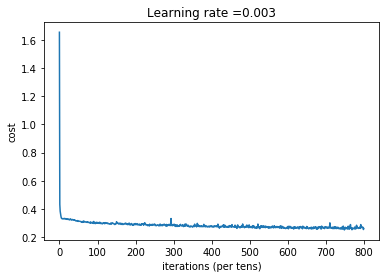

Parameters have been trained!
Train Accuracy: 0.9200181
Test Accuracy: 0.9266667


In [353]:
# run the model 
parameters = model(trainX, trainY, testX,testY)